In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [3]:
url='https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv'
df=pd.read_csv(url)
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


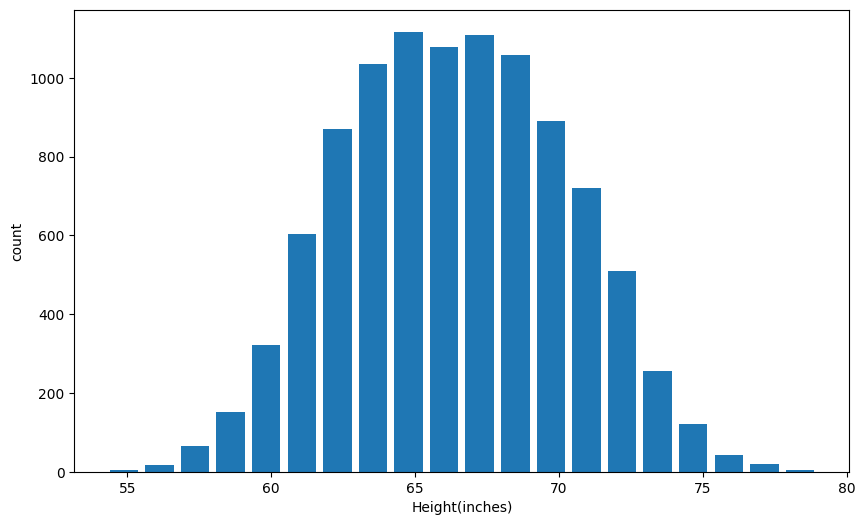

In [4]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel("Height(inches)")
plt.ylabel('count')
plt.show()

plot bell  curve along with histo

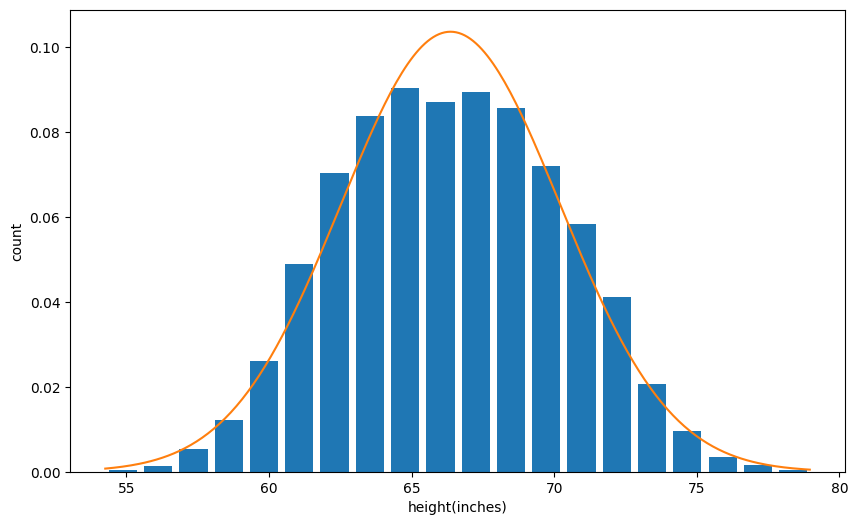

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('height(inches)')
plt.ylabel('count')
rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
df.height.mean()

np.float64(66.367559754866)

In [7]:
df.height.std()

np.float64(3.847528120795573)

In [8]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [9]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [10]:
df[(df.height>upper_limit)|(df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


remove outliers and generate new dataframe

In [11]:
df_no_outlier_std_dev=df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
df_no_outlier_std_dev.shape

(9993, 2)

In [13]:
df.shape

(10000, 2)

outlier remove using Z score

In [14]:
# Z=X-mehu/sd

In [15]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [17]:
df[(df.zscore<-3)|(df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Remove all outliers and form new dataframe

In [18]:
df_no_outliers=df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [19]:
df_no_outliers.shape

(9993, 3)

In [20]:
df.shape

(10000, 3)

EXERCISE

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)



In [22]:
url='https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv'
df=pd.read_csv(url)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [23]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

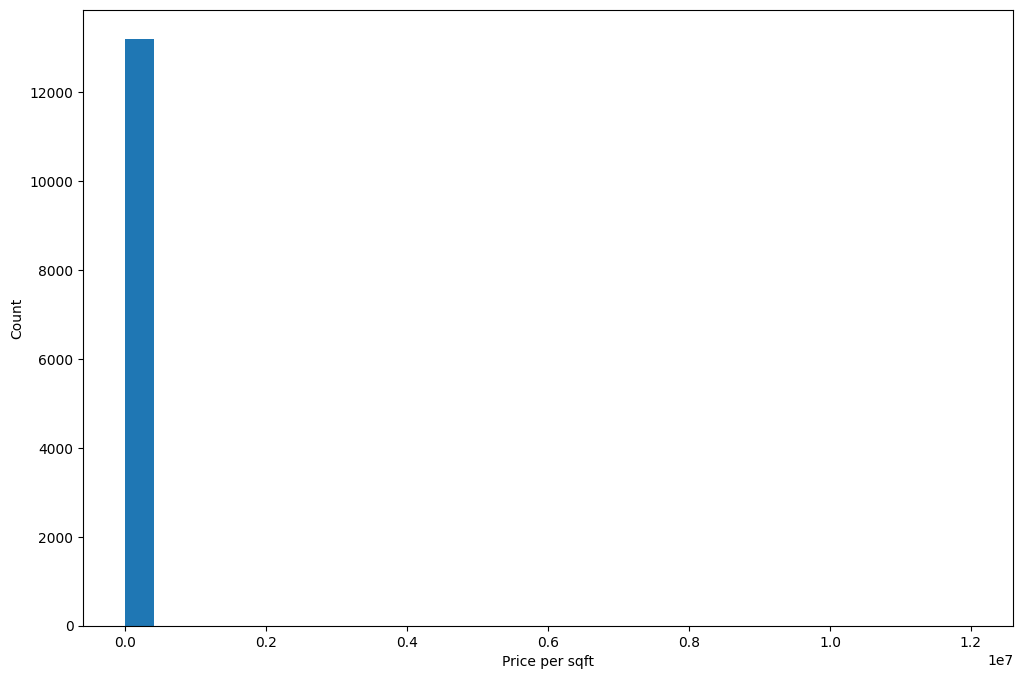

In [28]:
plt.hist(df.price_per_sqft,bins=30,rwidth=10.0)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

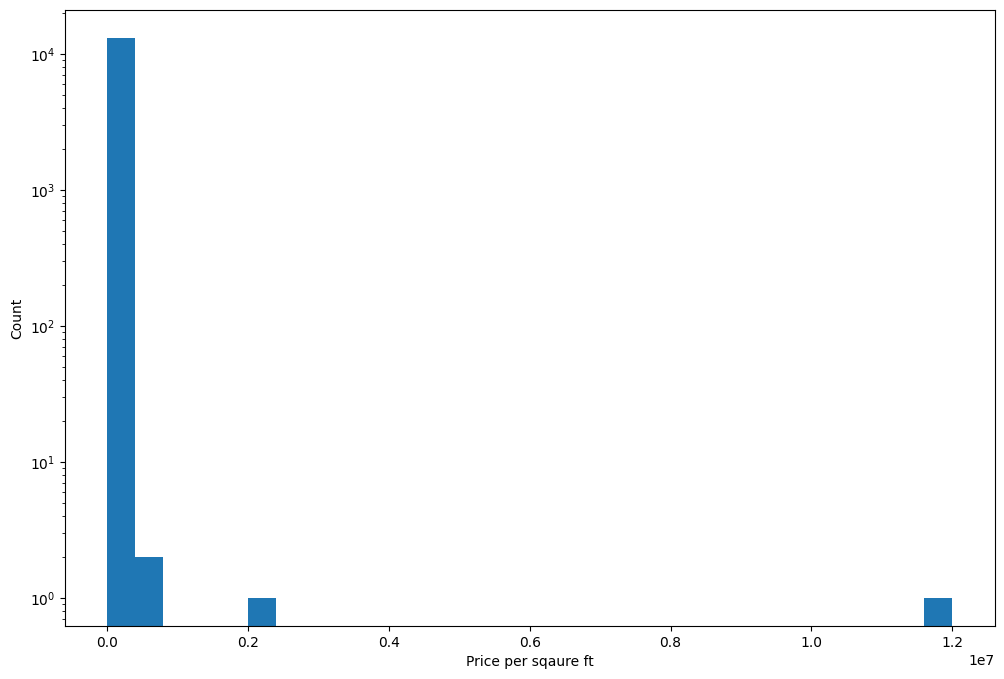

In [29]:
#use log scale
plt.hist(df.price_per_sqft,bins=30,rwidth=10.0)
plt.xlabel("Price per sqaure ft")
plt.ylabel('Count')
plt.yscale('log')
plt.show()